# Reading

Read the tenth chapter and conclusion/afterword (pg 179-231) of *Weapons of Math Destruction* and summarize the main ideas below.

1. **How do microtargeting models affect what we see on social media?**
Microtargeting models play a major role in what we see by prioritzing different things based off our history, our social networks and many other factors to illicit a certain response. By customizing the message to target individuals microtargeting can gain support in and connect like-minded individuals. In doing so this shapes what we see on our social media. Microtargeting identifies groups that it can influence and then pushes social media content to shape the users belief such as messages that Obama is a muslim or other such news even if false.  
2. **What suggestions does O'Neil make for "disarming" WMDs?**
Many of these algorithms are good at finding people in need. The problem then arises with what you do once you find them - do you target them for certain ads or deny them a loan. In these cases the object is to maximize profits or votes or various other factors but is always trying to get something from the person. If instead these algos coulb be used to identify and then help people instead of reinforcing sociatal boundries they would be much better. Developing models that can evolve as building models off the past to influence the present can encode some unfair biases. To do this we should try to add human values and moral judgement to this models evn though it may decrease the model performance. Models should be tested and scored for fairness and regulations needed. Furthermore adding stipulations of only user-approved data mining could prevent further discrimination and classifying of people by limiting data taking one more step to un-black boxing some of these models.

3. **What kinds of models does O'Neil suggest would do good for society?**
  Models that look to identify and help instead of identify and then target can be very good. These models are very good at identifying those in need and could be used for outreach thus helping a group in need instead of further punishing a group in need. The simple shift in these models to outreach based results eliminates much of these models WMD abilities and decreases the positive feedback loop, making them more fair. Furthermore these models must be transparent with what data there using and open to audits to avoid biased variables or discriminatory proxies.  

# Moons

The code below creates a nonlinear dataset.

Develop a neural network that fits this dataset well. Specifically:

1. **Design the network with appropriate input and output layers.**
2. **Compile the network with an appropriate loss function, train it, and plot the learning curve.**
3. **Adjust the hidden layers, learning rate, and epochs until the learning curve is satisfactory.**
4. **Evaluate the network on 10,000 test instances.**

In [1]:
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import seaborn as sns
import pandas as pd


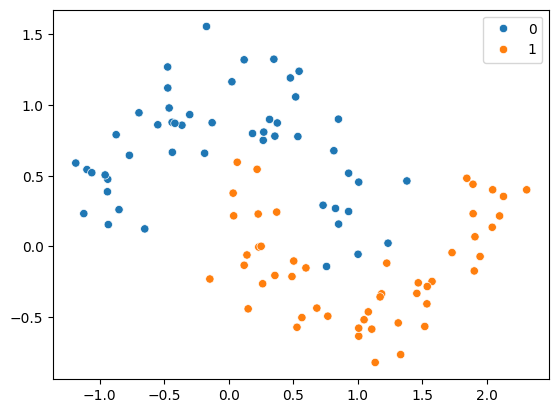

In [2]:
# Moons dataset
xtrain, ytrain = make_moons(n_samples=100, noise=0.2)
xval, yval = make_moons(n_samples=100, noise=0.2)
plot = sns.scatterplot(x=xtrain[:,0], y=xtrain[:,1], hue=ytrain)

In [3]:
# scaling
scaler = StandardScaler().fit(xtrain)
xtrain = scaler.transform(xtrain)
xval = scaler.transform(xval)

In [4]:
# Check shape
# shape is rows and columns
xtrain.shape

(100, 2)

In [5]:
network = keras.models.Sequential([
    keras.Input(shape=(2,)), # 2 input layers - tuple only has 1d for now, 2d example = image
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(1,activation ="sigmoid") # if 2 classes use "sigmoid", otherwise softmax
])

In [6]:
network.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = keras.optimizers.Adam(learning_rate = 0.01))
history = network.fit(xtrain,ytrain,epochs = 200, validation_data=(xval,yval), verbose = False)

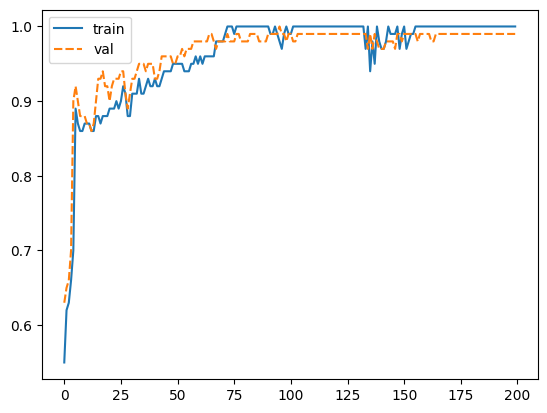

In [7]:
curve = pd.DataFrame({"train":history.history["accuracy"], "val":history.history["val_accuracy"]})
plot = sns.lineplot(data = curve)

In [8]:
# Try test data
xtest, ytest = make_moons(n_samples=10000, noise=0.2)
xtest = scaler.transform(xtest)
network.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1769 - accuracy: 0.9582


[0.17688564956188202, 0.9581999778747559]

# Gaussians

The code below creates another nonlinear dataset.

Develop a neural network that fits this dataset well. Specifically:

1. **Design the network with appropriate input and output layers.**
2. **Compile the network with an appropriate loss function, train it, and plot the learning curve.**
3. **Adjust the hidden layers, learning rate, and epochs until the learning curve is satisfactory.**
4. **Evaluate the network on 10,000 test instances.**



In [9]:
from sklearn.datasets import make_gaussian_quantiles

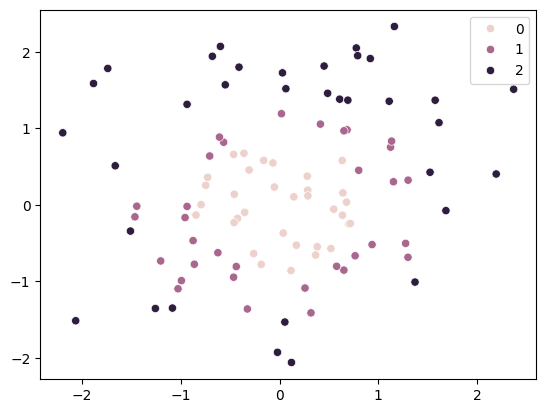

In [10]:
# Gaussian dataset
xtrain, ytrain = make_gaussian_quantiles(n_samples=100)
xval, yval = make_gaussian_quantiles(n_samples=100)
plot = sns.scatterplot(x=xtrain[:,0], y=xtrain[:,1], hue=ytrain)

In [11]:
# scaling
scaler = StandardScaler().fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)
xval = scaler.transform(xval)

In [12]:
xtrain.shape

(100, 2)

In [27]:
network = keras.models.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(3,activation ="softmax")
])

In [28]:
network.compile(loss = "sparse_categorical_crossentropy", metrics = ["accuracy"], optimizer = keras.optimizers.Adam(learning_rate = 0.005))
history = network.fit(xtrain,ytrain,epochs = 200, validation_data=(xval,yval), verbose = False)


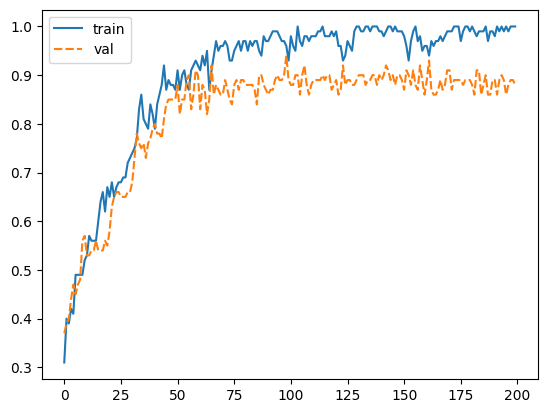

In [29]:
curve = pd.DataFrame({"train":history.history["accuracy"], "val":history.history["val_accuracy"]})
plot = sns.lineplot(data = curve)

In [30]:
# Try test data
xtest, ytest = make_gaussian_quantiles(n_samples=10000)
xtest = scaler.transform(xtest)
network.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1721 - accuracy: 0.9328


[0.17210440337657928, 0.9327999949455261]